In [2]:
data_path = '../../data/'

In [3]:
import random
import pickle

import pandas as pd
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
from jupyterthemes import jtplot

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from utils import TextProcessor

C:\Users\nikitosoleil\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [12]:
jtplot.style('gruvboxd')

In [4]:
que = pd.read_csv(data_path + 'questions.csv')
tag_que = pd.read_csv(data_path + 'tag_questions.csv')
tags = pd.read_csv(data_path + 'tags.csv')
pro = pd.read_csv(data_path + 'professionals.csv')
ans = pd.read_csv(data_path + 'answers.csv')

In [7]:
que_tags = que.merge(tag_que, left_on = 'questions_id', right_on = 'tag_questions_question_id').merge(tags, left_on = 'tag_questions_tag_id', right_on = 'tags_tag_id')
que_tags = que.merge(que_tags, on = 'questions_id')
ans_que_tags = ans.merge(que_tags, left_on = "answers_question_id", right_on = "questions_id")
df = ans_que_tags.merge(pro, left_on = 'answers_author_id', right_on = 'professionals_id')

In [8]:
df

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body,questions_id,questions_author_id_x,questions_date_added_x,questions_title_x,questions_body_x,...,questions_body_y,tag_questions_tag_id,tag_questions_question_id,tags_tag_id,tags_tag_name,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,...,What is a maths teacher? what is a ma...,14147,332a511f1569444485cf7a7a556a5e54,14147,lecture,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
1,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,...,What is a maths teacher? what is a ma...,27490,332a511f1569444485cf7a7a556a5e54,27490,college,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
2,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,...,What is a maths teacher? what is a ma...,21438,332a511f1569444485cf7a7a556a5e54,21438,professor,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
3,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,<p>Hi Rodrigo!</p>\n<p>The important thing to ...,0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,what kind of college could i go to for a soc...,I like soccer because i been playing sense i w...,...,I like soccer because i been playing sense i w...,27490,0f1d6a4f276c4a05878dd48e03e52289,27490,college,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
4,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,<p>Hi Rodrigo!</p>\n<p>The important thing to ...,0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,what kind of college could i go to for a soc...,I like soccer because i been playing sense i w...,...,I like soccer because i been playing sense i w...,21015,0f1d6a4f276c4a05878dd48e03e52289,21015,building,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
5,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,<p>Hi Rodrigo!</p>\n<p>The important thing to ...,0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,what kind of college could i go to for a soc...,I like soccer because i been playing sense i w...,...,I like soccer because i been playing sense i w...,21727,0f1d6a4f276c4a05878dd48e03e52289,21727,soccer,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,2015

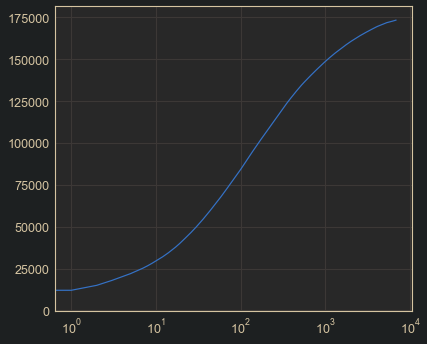

In [15]:
plt.plot(df.tags_tag_name.value_counts().values.cumsum())
plt.xscale('log')

In [16]:
df.tags_tag_name.value_counts()[:1000]

college                               8074
career                                3944
engineering                           2966
business                              2884
medicine                              2266
technology                            1818
college-major                         1724
doctor                                1525
science                               1504
psychology                            1460
finance                               1402
computer-science                      1256
nursing                               1202
career-counseling                     1194
accounting                            1184
teaching                              1181
education                             1095
computer                              1081
engineer                              1075
healthcare                            1074
law                                   1056
teacher                               1024
marketing                             1009
career-choi